## Homework 6: Putting it all together 

## Table of contents
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Optional) [Your takeaway from the course](#15)

## Imports

In [48]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

In [49]:
df = pd.read_csv('hw6_data/UCI_Credit_card.csv', header=0)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Dataset seems well made, has a lot of good features that will help us predict whether people will deafult or not.  This should be interesting to see how certain features may play more of a role than others.  Dataset has mostly numeric columns, with nine categorical columns(7 ordinal, 2 binary).

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [50]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   2100

In [52]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


There appears to be no missing data, so we won't need to impute any data.  Every feature has a float or int datatype, but sex, education, marriage, and pay_0 - pay_6 are all categorical.  Education and pay_0 - pay_6 are ordinal features, so we will need to implement ordinalencoder.  Sex and Marriage are binary columns, so we can use the drop = if_binary argument for the onehotencoder.  The sex column will probably get dropped due to ethical issues. <br> <br>
Metric used was accuracy

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [53]:
X_train, y_train = train_df.drop(columns=['default.payment.next.month']), train_df['default.payment.next.month']
X_test, y_test = test_df.drop(columns=['default.payment.next.month']), test_df['default.payment.next.month']

In [54]:
numeric_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'LIMIT_BAL', 'AGE']
ordinal_feats = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
categorical_feats = ['MARRIAGE','EDUCATION']
drop_feats = ['ID', 'SEX']

In [55]:
'''for column in ordinal_feats:
    print(sorted(train_df[column].unique()))'''

pay_levels = [[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8],
[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]]

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (StandardScaler(), numeric_feats),
    (OneHotEncoder(sparse_output=False), categorical_feats),
    (OrdinalEncoder(categories=pay_levels, dtype=int), ordinal_feats),
    ("drop", drop_feats),
    )


In [57]:
ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                                  'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                                  'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                  'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                                  'LIMIT_BAL', 'AGE']),
                                ('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['MARRIAGE', 'EDUCATION']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[[-2, -1, 0, 1, 2, 3,
                                                             4, 5, 6, 7, 8],
                                                            [-2, -1, 0, 1, 2, 3,
                                                             4, 5, 6, 7, 8],
                                                            [-2, -1, 0, 1, 2, 3,
                                                             4, 5, 6, 7, 8],
                                                            [-2, -1, 0, 1, 2, 3,
                                                             4, 5, 6, 7, 8],
                                                            [-2, -1, 0, 2, 3, 4,
                                                             5, 6, 7, 8],
                                                            [-2, -1, 0, 2, 3, 4,
                                                             5, 6, 7, 8]],
                                                dtype=<class 'int'>),
                                 ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6']),
                                ('drop', 'drop', ['ID', 'SEX'])])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [58]:
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')

pipe = make_pipeline(
    ct, dummy
)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6',
                                                   'LIMIT_BAL', 'AGE']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['MARRIAGE', 'EDUCATION']),
                                                 ('ordinal...er',
                                                  OrdinalEncoder(categories=[[-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                         

In [59]:
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
scores = cross_validate(pipe, X_train, y_train, cv=5, return_train_score=True)

pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.031958,0.015572,0.776905,0.776726
1,0.040407,0.016074,0.776905,0.776726
2,0.032300,0.008224,0.776667,0.776786
3,0.038027,0.002014,0.776667,0.776786
4,0.032734,0.007996,0.776667,0.776786


In [60]:
X_train_transformed = ct.fit_transform(X_train)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

The linear model without hyperparameter tuning achieves high accuracy and consistent performance in a short amount of time, as we can see from cross validating our training set. When we tune hyperparameters, we see that the best C value is 100, as that provides us with the highest validation score. 

In [61]:
from sklearn.linear_model import LogisticRegression

pipe_lr = make_pipeline(ct, LogisticRegression())
scores = cross_validate(pipe_lr, X_train, y_train, cv=5, return_train_score=True)
pd.DataFrame(scores)

c:\Users\dcopl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dcopl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

,fit_time,score_time,test_score,train_score
0,0.187144,0.016211,0.811190,0.810417
1,0.211641,0.008184,0.804524,0.809940
2,0.250756,0.013554,0.812143,0.808452
3,0.207769,0.008189,0.811190,0.807500
4,0.205585,0.010459,0.803810,0.809286


In [62]:
scores_dict = {
    "C": 10.0 ** np.arange(-4, 6, 1),
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
}
for C in scores_dict["C"]:
    lr = LogisticRegression(C=C)
    scores = cross_validate(lr, X_train_transformed, y_train, return_train_score=True)
    scores_dict["mean_train_scores"].append(scores["train_score"].mean())
    scores_dict["mean_cv_scores"].append(scores["test_score"].mean())

results_df = pd.DataFrame(scores_dict)
results_df

c:\Users\dcopl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dcopl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

,C,mean_train_scores,mean_cv_scores
0,0.0001,0.779000,0.779000
1,0.0010,0.801774,0.801762
2,0.0100,0.807702,0.807762
3,0.1000,0.808940,0.808429
4,1.0000,0.809083,0.808714
5,10.0000,0.809238,0.808619
6,100.0000,0.809155,0.808810
7,1000.0000,0.809298,0.808619
8,10000.0000,0.809167,0.808667
9,100000.0000,0.809143,0.808571


In [63]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

best_lr = LogisticRegression(C=100)

results_dict = {}

results_dict['lr'] = mean_std_cross_val_scores(best_lr, X_train_transformed, y_train, return_train_score=True)
pd.DataFrame(results_dict).T

c:\Users\dcopl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dcopl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

,fit_time,score_time,test_score,train_score
lr,0.299 (+/- 0.069),0.000 (+/- 0.000),0.809 (+/- 0.004),0.809 (+/- 0.001)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

logistic regression: Well fit as we tuned the hyperparameters already, Fast fit and score time <br />  KNN: Appears to be overfitting due to its higher training score,  Fast fit and score time <br />  Random Forest: Heavily overfitting, but it has a high validation score, this also takes the longest to fit by a lot <br />  Light GBM: Close to overfitting, with a half a second fit time

The Light GBM model appears to have beat the logistic regression as it does not take too much time, and has a higher test score. We were able to beat the linear model.

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier

results_dict['kNN'] = mean_std_cross_val_scores(KNeighborsClassifier(), X_train_transformed, y_train, return_train_score=True)
results_dict['rfc'] = mean_std_cross_val_scores(RandomForestClassifier(random_state=123, n_jobs=-1), X_train_transformed, y_train, return_train_score=True)
results_dict['LightGBM'] = mean_std_cross_val_scores(LGBMClassifier(random_state=123), X_train_transformed, y_train, return_train_score=True)

pd.DataFrame(results_dict).T

C:\Users\dcopl\AppData\Local\Temp\ipykernel_14008\656451673.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
C:\Users\dcopl\AppData\Local\Temp\ipykernel_14008\656451673.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3268
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223274 -> initscore=-1.246689
[LightGBM] [Info] Start training from score -1.246689
[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3270
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223274 -> initscore=-1.246689
[LightGBM] [Info] Start training from score -1.246689
[LightGBM] [In

C:\Users\dcopl\AppData\Local\Temp\ipykernel_14008\656451673.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
lr,0.299 (+/- 0.069),0.000 (+/- 0.000),0.809 (+/- 0.004),0.809 (+/- 0.001)
kNN,0.008 (+/- 0.002),0.155 (+/- 0.016),0.791 (+/- 0.006),0.843 (+/- 0.002)
rfc,2.455 (+/- 0.930),0.074 (+/- 0.022),0.814 (+/- 0.004),0.999 (+/- 0.000)
LightGBM,0.532 (+/- 0.217),0.015 (+/- 0.002),0.818 (+/- 0.005),0.852 (+/- 0.001)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

In [65]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_grid_rf = {
    "max_depth": [1,2,3,4,5,6,7,8,9,10],
    "max_features": [1,2,3,4,5],
    "n_estimators": [50,100,150],
}

param_grid_kNN = {
    "n_neighbors": np.arange(36, 85, 5)
}

param_grid_lgbm = {
    'num_leaves': [5, 20, 31],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth' : [-1, 1, 2]
}

In [67]:
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid_kNN, cv=5, n_jobs=-1, return_train_score=True)
knn_grid.fit(X_train_transformed, y_train)

pd.DataFrame(knn_grid.cv_results_)[
    [
        "mean_test_score",
        "param_n_neighbors",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

rank_test_score,1,2,3,4,5,6,7,8,9,10
mean_test_score,0.813952,0.813714,0.813524,0.813476,0.813190,0.813143,0.813095,0.812857,0.812857,0.812762
param_n_neighbors,51.000000,71.000000,66.000000,56.000000,61.000000,81.000000,46.000000,76.000000,36.000000,41.000000
mean_fit_time,0.030213,0.021049,0.019999,0.028725,0.018596,0.026512,0.036807,0.019908,0.015445,0.023461


In [34]:
rf = RandomForestClassifier(random_state=123, n_jobs=-1)
random_search = RandomizedSearchCV(
    rf, param_distributions=param_grid_rf, n_jobs=-1, n_iter=25, cv=5, random_state=123
)
random_search.fit(X_train_transformed, y_train);

pd.DataFrame(random_search.cv_results_)[
    [
        "mean_test_score",
        "param_max_depth",
        "param_max_features",
        "param_n_estimators",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

rank_test_score,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,24
mean_test_score,0.817667,0.817571,0.817095,0.815524,0.814190,0.812905,0.811857,0.811714,0.810762,0.810667,...,0.801714,0.798286,0.798095,0.797286,0.796143,0.792238,0.777381,0.776952,0.776762,0.776762
param_max_depth,9.000000,7.000000,9.000000,8.000000,6.000000,6.000000,10.000000,5.000000,9.000000,8.000000,...,2.000000,3.000000,7.000000,3.000000,2.000000,3.000000,4.000000,4.000000,1.000000,1.000000
param_max_features,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,3.000000,5.000000,3.000000,3.000000,...,5.000000,3.000000,1.000000,3.000000,4.000000,2.000000,1.000000,1.000000,3.000000,5.000000
param_n_estimators,100.000000,150.000000,50.000000,150.000000,100.000000,50.000000,50.000000,50.000000,100.000000,100.000000,...,100.000000,100.000000,50.000000,50.000000,50.000000,50.000000,50.000000,100.000000,150.000000,100.000000
mean_fit_time,6.606812,10.799223,7.510963,10.469085,9.346016,3.824228,3.578506,2.102958,5.755856,8.299853,...,2.918015,5.419033,2.172060,4.071169,2.860914,2.259690,1.155113,2.730641,3.699287,2.444486


In [38]:
lgbm_grid = GridSearchCV(LGBMClassifier(random_state=123, n_jobs=-1), param_grid_lgbm, cv=5, n_jobs=-1, return_train_score=True)
lgbm_grid.fit(X_train_transformed, y_train)

pd.DataFrame(lgbm_grid.cv_results_)[
    [
        "mean_test_score",
        "param_num_leaves",
        "param_learning_rate",
        "param_n_estimators",
        "param_max_depth",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

[LightGBM] [Info] Number of positive: 4688, number of negative: 16312
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3272
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223238 -> initscore=-1.246895
[LightGBM] [Info] Start training from score -1.246895


rank_test_score,1,2,3,3,5,5,5,8,8,8,...,70,73,73,73,76,77,78,79,79,79
mean_test_score,0.821238,0.820810,0.820762,0.820762,0.820714,0.820714,0.820714,0.820429,0.820429,0.820429,...,0.817000,0.816952,0.816952,0.816952,0.815333,0.814857,0.813667,0.813143,0.813143,0.813143
param_num_leaves,20.000000,5.000000,5.000000,5.000000,5.000000,31.000000,20.000000,31.000000,5.000000,20.000000,...,20.000000,31.000000,20.000000,5.000000,31.000000,20.000000,31.000000,31.000000,20.000000,5.000000
param_learning_rate,0.050000,0.100000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.100000,0.050000,0.050000,0.050000,0.200000,0.200000,0.200000,0.050000,0.050000,0.050000
param_n_estimators,50.000000,50.000000,100.000000,150.000000,100.000000,100.000000,100.000000,50.000000,50.000000,50.000000,...,50.000000,100.000000,100.000000,100.000000,100.000000,150.000000,150.000000,50.000000,50.000000,50.000000
param_max_depth,-1.000000,-1.000000,-1.000000,-1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000
mean_fit_time,1.133142,1.697828,0.791028,0.978389,1.547058,2.022737,2.524534,0.970656,1.838883,1.148788,...,0.373805,1.107747,1.384486,1.346489,4.938813,4.283942,11.922893,0.765093,0.350771,0.200847


Our best hyperparameter values were: <br>
kNN: 51 Neighbors <br>
Random Forest: Max Depth: 9, Max Features: 5, n Estimators: 100 <br>
LightGBM: Leaves: 20, Learning Rate: 0.05, n Estimators: 50, Max Depth: -1 <br>

Better results could be found with more iterations on random forest, but we are saving time by not checking every single hyperparameter we have.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

In [69]:
column_names = (
    numeric_feats
    + ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
    + ordinal_feats
)

In [70]:
X_train_enc = pd.DataFrame(
    data=X_train_transformed,
    columns=column_names,
    index=X_train.index,
)
X_train_enc

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,...,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
16395,-0.300665,-0.293394,-0.265310,-0.371930,-0.494781,-0.587035,-0.039546,-0.040229,-0.234603,-0.114944,...,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0
21448,-0.685307,-0.679495,0.585444,1.970295,1.805461,1.327534,-0.297166,3.739796,6.785208,-0.113778,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0
20034,-0.696132,-0.688319,-0.681234,-0.670935,-0.661045,-0.650908,-0.333097,-0.270403,-0.289017,-0.309323,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25755,0.687456,0.752583,0.835581,0.918719,0.501203,0.144527,-0.115517,-0.018028,-0.060260,-0.113843,...,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0
1438,-0.040230,-0.031399,-0.287429,-0.245237,-0.204599,-0.191104,-0.333097,-0.206185,-0.223720,-0.212134,...,0.0,0.0,0.0,0.0,3.0,4.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,-0.513226,-0.486648,-0.488648,-0.450259,-0.400085,-0.389539,-0.262410,-0.210772,-0.221435,-0.186216,...,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,3.0
17730,-0.695886,-0.688067,-0.680974,-0.630868,-0.618584,-0.534120,-0.333097,-0.270403,-0.148629,-0.309323,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,1.0
28030,-0.053288,-0.010446,-0.003381,-0.062716,-0.516534,-0.499414,-0.215559,-0.178663,-0.205764,-0.244530,...,1.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0
15725,-0.309066,-0.288478,-0.254590,-0.195023,-0.179691,-0.372606,-0.215677,-0.178663,-0.180189,-0.194963,...,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0


In [73]:
import shap

best_lgbm = LGBMClassifier(num_leaves=20, learning_rate=.05, n_estimators=50, random_state=123, n_jobs=-1)

model = best_lgbm.fit(X_train_enc, y_train)

lgbm_explainer = shap.TreeExplainer(model)
train_lgbm_shap_values = lgbm_explainer.shap_values(X_train_enc)

[LightGBM] [Info] Number of positive: 4688, number of negative: 16312
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3272
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223238 -> initscore=-1.246895
[LightGBM] [Info] Start training from score -1.246895


c:\Users\dcopl\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


In [80]:
values = np.abs(train_lgbm_shap_values).mean(0)
pd.DataFrame(data=values, index=column_names, columns=["SHAP"]).sort_values(
    by="SHAP", ascending=False
)

,SHAP
PAY_0,0.452713
LIMIT_BAL,0.126702
PAY_AMT2,0.085343
PAY_2,0.082098
PAY_3,0.079811
BILL_AMT1,0.076912
PAY_AMT3,0.068447
PAY_AMT1,0.063984
PAY_6,0.051082
PAY_4,0.047470


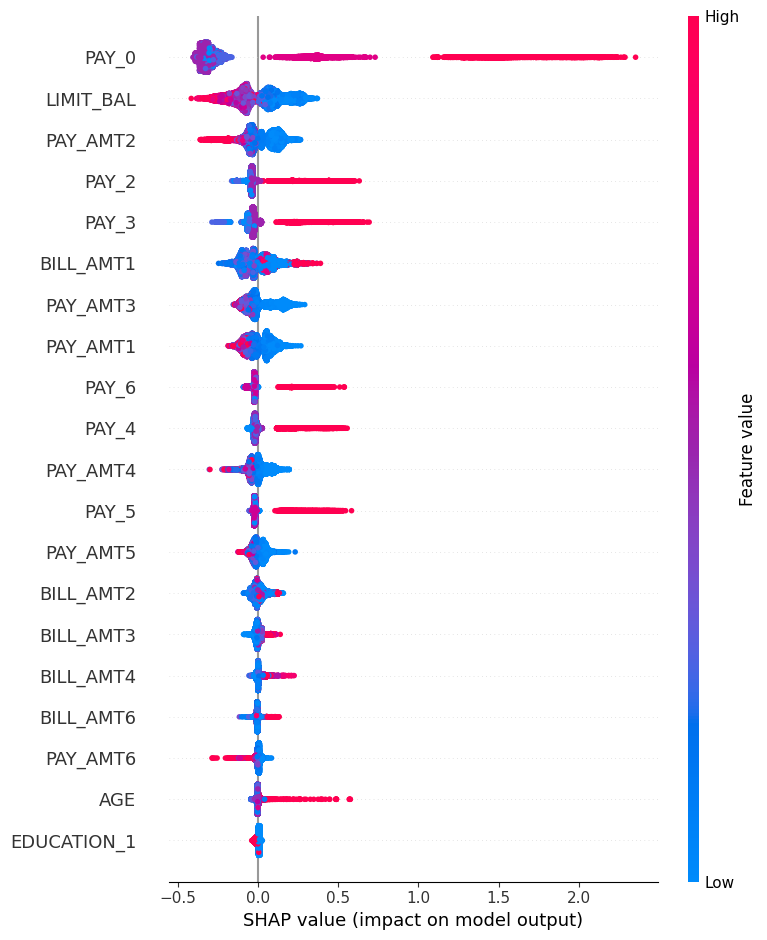

In [75]:
shap.summary_plot(train_lgbm_shap_values, X_train_enc)

<div class="alert alert-warning">
    
Solution_11
    
</div>

The most important feature for lightgbm seems to be pay_0, which makes sense because this shows their most recent repayment status.  This seems to be taken into consideration a lot more than any other feature, as the second most important feature, limit_bal, has almost 1/4 the SHAP value as pay_0.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

In [76]:
X_test_transformed = ct.fit_transform(X_test)

results_best = mean_std_cross_val_scores(LGBMClassifier(num_leaves=20, learning_rate=0.05, n_estimators=50, max_depth=-1), X_test_transformed, y_test)
pd.DataFrame(results_best)


[LightGBM] [Info] Number of positive: 1559, number of negative: 5641
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3241
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216528 -> initscore=-1.286017
[LightGBM] [Info] Start training from score -1.286017
[LightGBM] [Info] Number of positive: 1559, number of negative: 5641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3238
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216528 -> initscore=-1.286017
[LightGB

C:\Users\dcopl\AppData\Local\Temp\ipykernel_14008\656451673.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,0
fit_time,0.098 (+/- 0.008)
score_time,0.006 (+/- 0.004)
test_score,0.821 (+/- 0.004)


In [77]:
X_test_enc = pd.DataFrame(
    data=X_test_transformed,
    columns=column_names,
    index=X_test.index,
)

test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_enc)
test_lgbm_shap_values.shape

c:\Users\dcopl\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


(9000, 31)

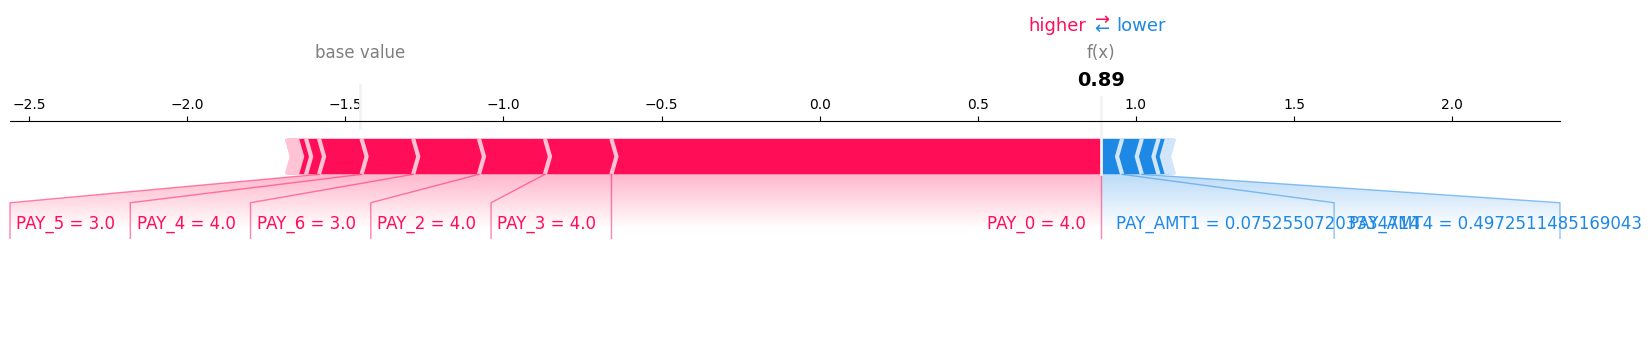

In [78]:
shap.force_plot(
    lgbm_explainer.expected_value,
    test_lgbm_shap_values[2],
    X_test_enc.iloc[2],
    matplotlib=True,
)

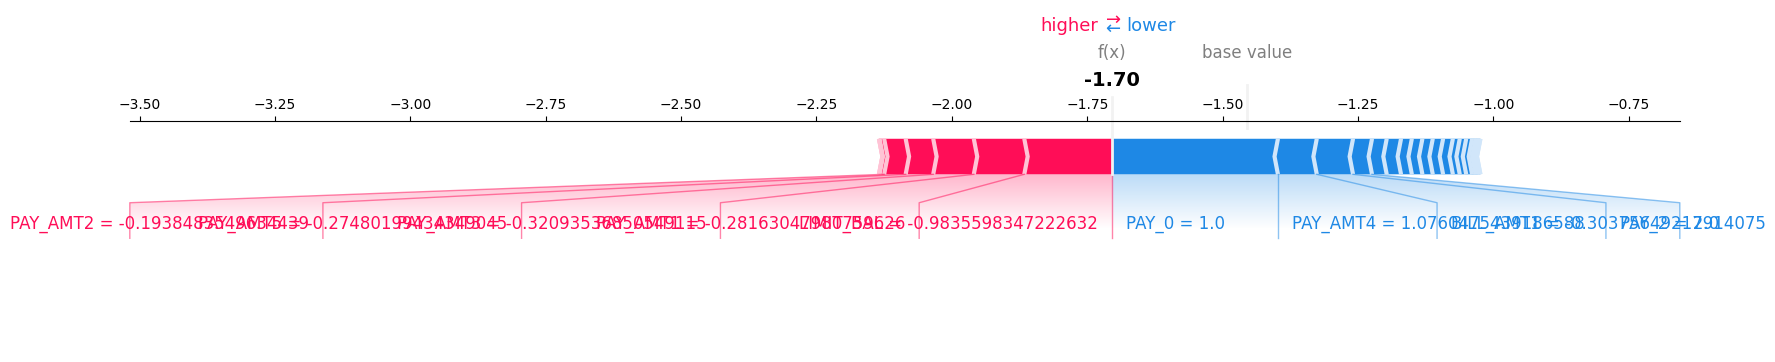

In [79]:
shap.force_plot(
    lgbm_explainer.expected_value,
    test_lgbm_shap_values[0],
    X_test_enc.iloc[0],
    matplotlib=True,
)

<div class="alert alert-warning">
    
Solution_12
    
</div>

Mean cross validation score on train set: 0.821238 <br>
Our Cross validation score was 0.821 also. This means that we have accurately tuned our hyperparameters and model enough to the point where can use it in the real world. We did not have issues with optimization bias as we recieved similar cross val scores. <br> 
As seen in the first SHAP force plot, it gives us a value of .89 and shows most predictors in the red.  This means that it is predicting the customer to default their payment next month, which is true.
The second SHAP force plot shows the opposite, prediciting the customer not to default. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook 

<div class="alert alert-warning">
    
Solution_13
    
</div>

| Feature | Value |
| --- | ----------- |
| Best model | LightGBM |
| Best Features: | ---|
| Leaves | 20 |
| Learning Rate | 0.05 |
| n Estimators | 50 | 
| Max Depth | -1 |
| Most Important Feature | PAY0 |
| Least Important Feature | Marriage & Education & Age |
| Model Training Time | 0.825 (+/- 0.001) |
| Metric | Accuracy |

<br>
  Final Scores

| Feature | Test Value | Training Value |
| --- | ----------- | ---------- |
| fit time | 0.098 (+/- 0.008) | 0.144 (+/- 0.042) |
| score time | 0.006 (+/- 0.004) | 0.007 (+/- 0.004) |
| test score | 0.821 (+/- 0.004) | 0.821 (+/- 0.005) |

<br> <br>
2. We found that the most important feature for our model was pay_0, which shows the customers' most recent repayment status.  We also found that the least important features for our model were education, age, and marriage status.  This goes to show how customers' demographic information does not play a huge role in the predictions.  Our model was able to correctly predict the test data with 82.1% accuracy, which also happened to be our validation accuracy.  This shows how our model did not overfit the training data, and that we didn't run into any optimization bias.  
<br>
3. Other ideas we had: We could have used SVM classifier instead to work on, but each fittment of the model took a lot of time. We also would have liked to spend more time hyperparameter tuning to get an even more precise model, but again these actions were time and resource heavy. 
<br><br>
4. Final test score: 0.821 (+/- 0.004), metric: accuracy

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

The biggest takeaway we learned is that there are many crucial decisions to make while building a ML model. After transforming all of our data, we were faced with decisions like what model should we use, which involved guessing a model to use and checking it against our baseline linear regression model. After seeing how those stack up, we start to tune our hyperparameters. This can be the process that takes the longest amount of time as we may have to run it multiple times to capture the best range of hyperparameters, with each search fitting a new machine learning model. After that, we need to determine the importance of various features, and finally implement. Each step of the process, especially if we are fitting a model, takes time to finely tune!

<!-- END QUESTION -->

<br><br>

Congratulations on finishing this project. This was a tricky one but you did it!